In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
df = pd.read_csv("Threats (1).csv")
df.head()

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0


In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]  

In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [6]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [7]:
X.fillna(X.median(), inplace=True)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [11]:
y_pred = dt_model.predict(X_test)

In [12]:
auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("AUC Score:", auc)
print("F1 Score:", f1)
print("MCC:", mcc)
print("Classification Report:\n", report)


AUC Score: 1.0
F1 Score: 1.0
MCC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00     23869

    accuracy                           1.00     27069
   macro avg       1.00      1.00      1.00     27069
weighted avg       1.00      1.00      1.00     27069



In [13]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(dt_model, X, y, cv=cv, scoring='f1')
print("Cross-Validation F1 Scores:", cross_val_scores)

Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]


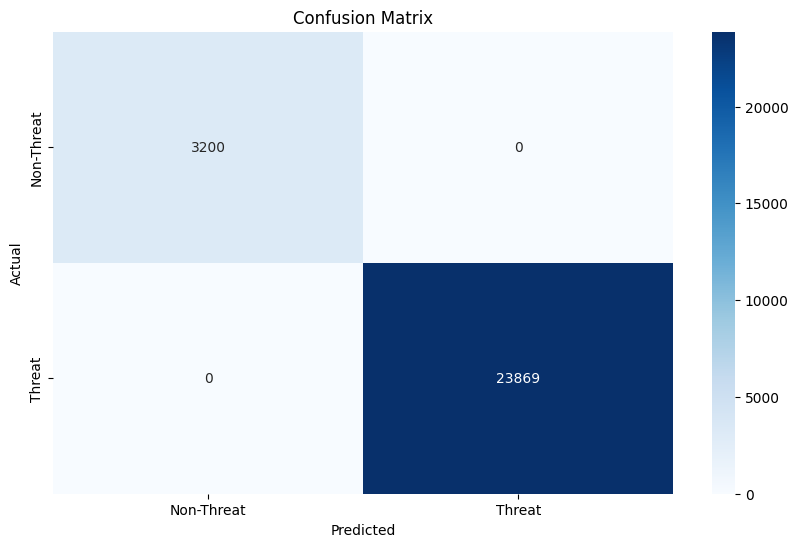

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Threat", "Threat"], yticklabels=["Non-Threat", "Threat"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

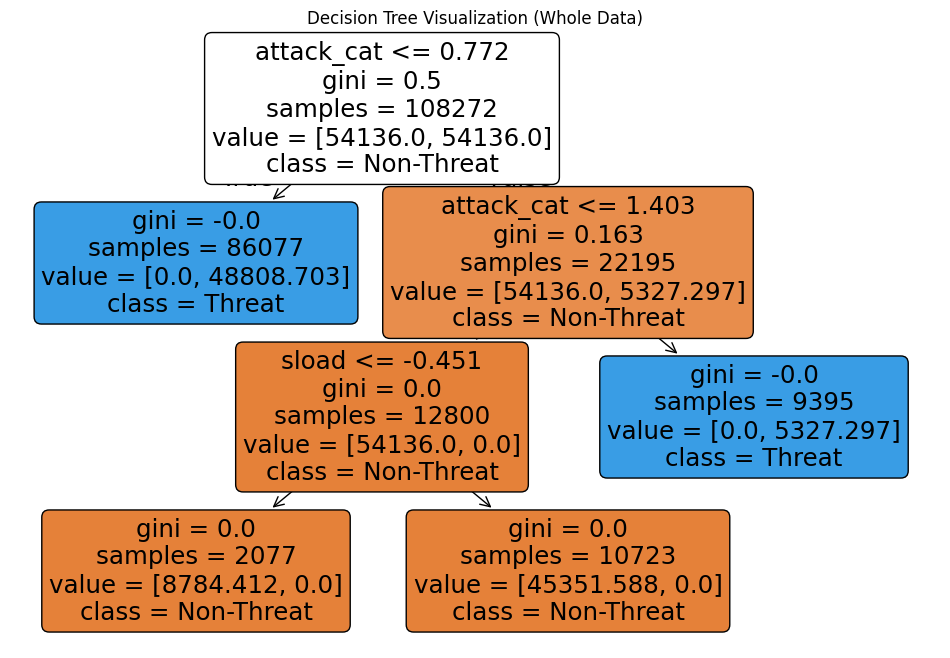

In [16]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Non-Threat", "Threat"], rounded=True)
plt.title("Decision Tree Visualization (Whole Data)")
plt.show()
